In [1]:
from collections import defaultdict
from itertools import chain
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy.signal
import seaborn as sns
from sklearn.mixture import GaussianMixture
from tqdm import tqdm_notebook as tqdm

%matplotlib inline

In [44]:
PREFIX = "/data/analytics/catch_bonds/1sq0"
df_dict = dict()

props_list = ["dist_com", "dists_max_chains", "rmsd_A", "gyration_A"]
cols_list = [["Center-of-mass distance, nm"], ["Maximum distance, nm"], ["RMSD, nm"], ["Radius of gyration, nm", "Rx, nm", "Ry, nm", "Rz, nm"]]
# pairs = [None, (44, 5), (45, 6), (66, 83), (98, 152)]
pairs = [None, (44, 5), (45, 8), (67, 235), (68, 236)]

for pair in pairs:
    if pair is None:
        pair_str = ""
    else:
        pair_str = "_fix_{}_{}_1".format(*pair)
        
    df_dict[pair] = dict()
    
    for prop, cols in zip(props_list, cols_list):
        df_dict[pair][prop] = dict()

        for rep in range(1, 11):
            df_dict[pair][prop][rep] = dict()

            for force in np.arange(0, 2.1, .1):
                force_str = str(int(force)) if force == int(force) else str(force)

                if prop == "dist_com":
                    df = pd.read_csv("{}{}/{}/{}_{}.xvg".format(PREFIX, pair_str, prop, rep, force_str), 
                                     skiprows=23 + len(cols), 
                                     header=None,
                                     engine="python",
                                     sep="    ")
                else:
                    df = pd.read_csv("{}{}/{}/{}_{}.xvg".format(PREFIX, pair_str, prop, rep, force_str), 
                                     skiprows=23 + len(cols), 
                                     header=None,
                                     engine="python",
                                     sep="\s+")

                df.columns = ["Frame"] + cols

                df_dict[pair][prop][rep][int(force * 10)] = df

/home/analytics/anaconda3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


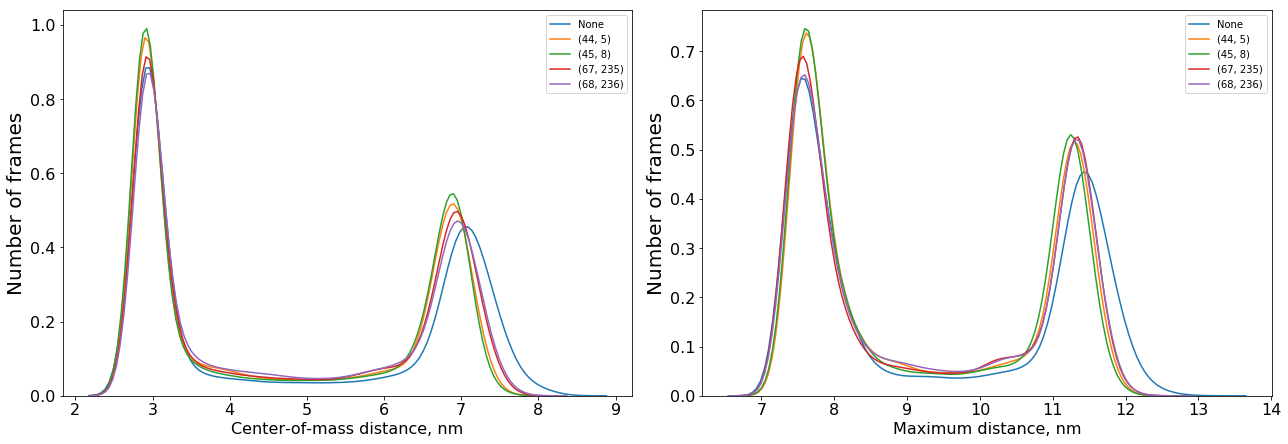

In [45]:
props = ["dist_com", "dists_max_chains"]
# props = ["dists_max_chains"]
prop_names = ["Center-of-mass distance, nm", "Maximum distance, nm"]

fig = plt.figure(figsize=(18, 6 * len(pairs)))

for prop_i, (prop, prop_name) in enumerate(zip(props, prop_names)):
    for p_i, pair in enumerate(pairs):
        prop_dict = defaultdict(list)

        for rep in range(1, 11):
            for force in np.arange(0, 2.1, .1):
                prop_dict[int(force * 10)].extend(df_dict[pair][prop][rep][int(force * 10)].values[:, 1])

        ax = fig.add_subplot(len(pairs), len(props), prop_i + 1)
        l = list(chain(*[v for v in prop_dict.values()]))
        sns.distplot([ll for ll in l if not pd.isnull(ll)], ax=ax, label=str(pair), hist=False)

        [t.set_fontsize(16) for t in ax.get_xticklabels()]
        ax.set_xlabel(prop_name, fontdict={"size": 16})
        [t.set_fontsize(16) for t in ax.get_yticklabels()]
        ax.set_ylabel("Number of frames", fontdict={"size": 20})
        
plt.legend()
plt.tight_layout()

/home/analytics/anaconda3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


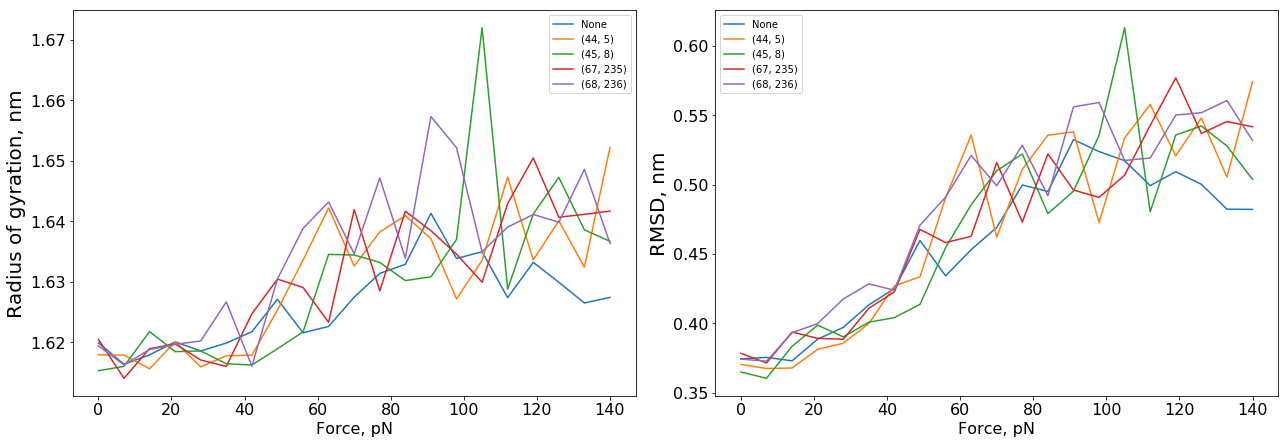

In [46]:
fig = plt.figure(figsize=(18, 6 * len(pairs)))

props = ["gyration_A", "rmsd_A"]
prop_names = ["Radius of gyration, nm", "RMSD, nm"]

for prop_i, (prop, prop_name) in enumerate(zip(props, prop_names)):
    for p_i, pair in enumerate(pairs):
#         print(pair)

        prop_dict = defaultdict(list)

        for rep in range(1, 11):
            for force in np.arange(0, 2.1, .1):
                prop_dict[int(force * 10)].extend(df_dict[pair][prop][rep][int(force * 10)].values[:, 1])

        ax = fig.add_subplot(len(pairs), 2, prop_i + 1)
        
        xs, ys = zip(*[(k, np.mean(v)) for k, v in prop_dict.items()])
        ax.plot(np.array(xs) * 7, ys, label=str(pair))

        [t.set_fontsize(16) for t in ax.get_xticklabels()]
        ax.set_xlabel("Force, pN", fontdict={"size": 16})
        [t.set_fontsize(16) for t in ax.get_yticklabels()]
        ax.set_ylabel(prop_name, fontdict={"size": 20})
        
    plt.legend()
plt.tight_layout()

/home/analytics/anaconda3/lib/python3.5/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


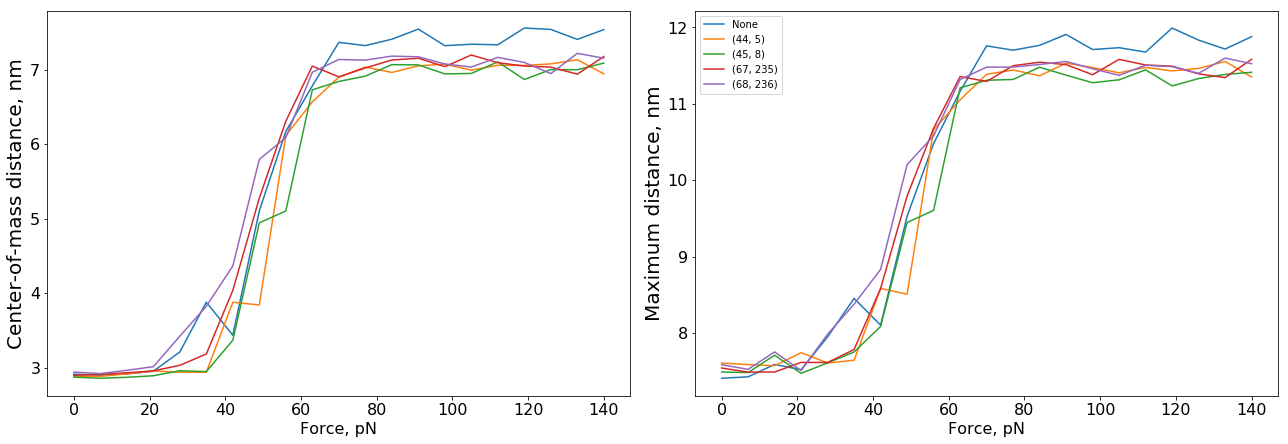

In [47]:
fig = plt.figure(figsize=(18, 6 * len(pairs)))

props = ["dist_com", "dists_max_chains"]
prop_names = ["Center-of-mass distance, nm", "Maximum distance, nm"]

for prop_i, (prop, prop_name) in enumerate(zip(props, prop_names)):
    for p_i, pair in enumerate(pairs):
#         print(pair)

        prop_dict = defaultdict(list)

        for rep in range(1, 11):
            for force in np.arange(0, 2.1, .1):
                prop_dict[int(force * 10)].extend(df_dict[pair][prop][rep][int(force * 10)].values[:, 1])

        ax = fig.add_subplot(len(pairs), 2, prop_i + 1)
        
        xs, ys = zip(*[(k, np.mean(v[999::1000])) for k, v in prop_dict.items()])
        ax.plot(np.array(xs) * 7, ys, label=str(pair))
        
        [t.set_fontsize(16) for t in ax.get_xticklabels()]
        ax.set_xlabel("Force, pN", fontdict={"size": 16})
        [t.set_fontsize(16) for t in ax.get_yticklabels()]
        ax.set_ylabel(prop_name, fontdict={"size": 20})
        
plt.legend()
plt.tight_layout()

In [24]:
import nglview as nv
import pytraj as pt

In [26]:
view = nv.NGLWidget()

In [67]:
view.representations = [
        {
            "type": "tube", "params": {
                "sele": "not helix", 
                "color": "residueindex",
                "colorscheme": "rainbow"
            }
        },
        {
            "type": "ball+stick", "params": {
                "sele": "hetero"
            }
        },
        {
            "type": "ribbon", "params": {
                "sele": "helix",
                "color": "residueindex",
                "colorscheme": "rainbow"
            }
        },
        {
            "type": "molecularsurface", "params": {
                "sele": "sheet",
                "color": "residueindex",
                "colorscheme": "rainbow"
            }
        }
    ]
view.parameters = {
    "backgroundColor": "black",
}

In [117]:
traj = pt.load("/nfsdata/artem/1sq0/movies/8_0.9.pdb")
view = nv.show_pytraj(traj)

In [118]:
view

NGLWidget(count=1000)